In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [2]:
imdb_train, imdb_validate, imdb_test = tfds.load(
    name='imdb_reviews', 
    split=['train[:80%]', 'train[80%:]', 'test'],
    as_supervised=True
)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLQ4T4S/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLQ4T4S/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLQ4T4S/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
next(imdb_train.take(1).as_numpy_iterator())

(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 0)

In [4]:
import tensorflow_hub as hub

embedding = 'https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1'
embedding_layer = hub.KerasLayer(
    embedding, 
    input_shape=[], 
    dtype=tf.string,
    trainable=True
)

In [5]:
reviews_batch, labels_batch = next(iter(imdb_train.batch(1)))
embedding_layer(reviews_batch)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ]],
      dtype=float32)>

In [6]:
model = models.Sequential()
model.add(embedding_layer)
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 14)                294       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15        
Total params: 400,329
Trainable params: 400,329
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    imdb_train.cache().shuffle(10_000).batch(32),
    epochs=10,
    validation_data=imdb_validate.cache().batch(32)
)

Epoch 1/10
625/625 [==============================] - 5s 8ms/step - loss: 0.5298 - accuracy: 0.7422 - val_loss: 0.4083 - val_accuracy: 0.8170
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3587 - accuracy: 0.8472 - val_loss: 0.3338 - val_accuracy: 0.8542
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2914 - accuracy: 0.8802 - val_loss: 0.3088 - val_accuracy: 0.8684
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2542 - accuracy: 0.8964 - val_loss: 0.2947 - val_accuracy: 0.8766
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2297 - accuracy: 0.9099 - val_loss: 0.2845 - val_accuracy: 0.8830
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2105 - accuracy: 0.9191 - val_loss: 0.2846 - val_accuracy: 0.8820
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1965 - accuracy: 0.9241 - val_loss: 0.3042 - val_accuracy: 0.8766
Epoch 

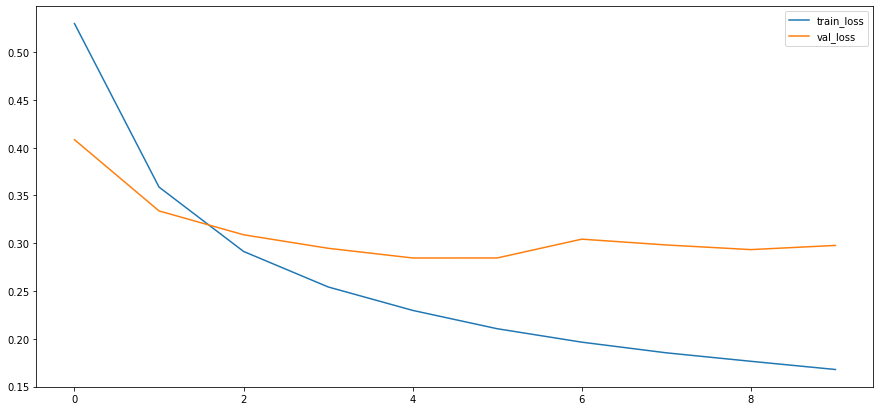

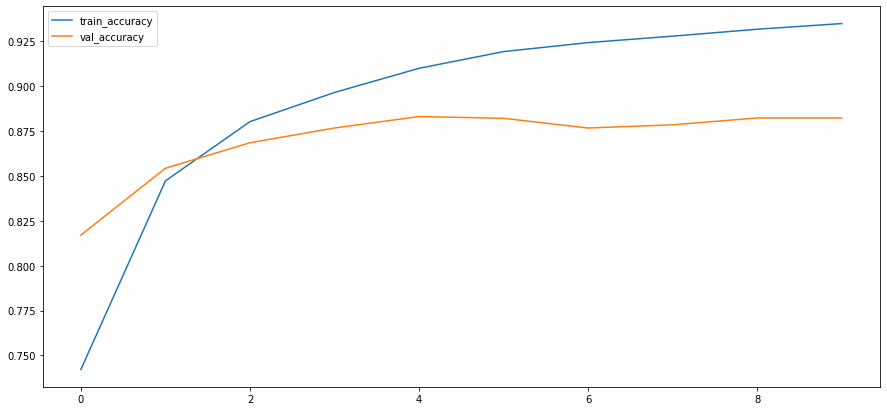

In [13]:
plt.figure(figsize=(15,7))
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.legend(["train_loss", "val_loss"])

plt.figure(figsize=(15,7))
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.legend(["train_accuracy", "val_accuracy"])